# Selecione um conjunto de dados de série temporal do Kaggle e inclua o link deste dataset no seu Notebook.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Dataset de Stocks da Microsoft - https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis

!kaggle datasets download -d vijayvvenkitesh/microsoft-stock-time-series-analysis

!unzip microsoft-stock-time-series-analysis.zip


Dataset URL: https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis
License(s): CC0-1.0
  0% 0.00/26.7k [00:00<?, ?B/s]
100% 26.7k/26.7k [00:00<00:00, 35.9MB/s]
Archive:  microsoft-stock-time-series-analysis.zip
  inflating: Microsoft_Stock.csv     


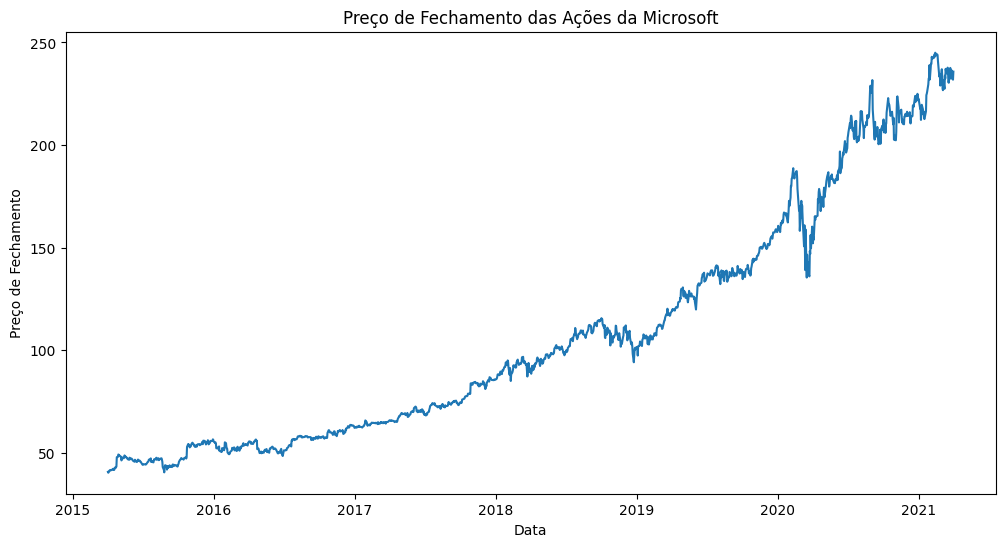

In [13]:
# Carregar o dataset
df = pd.read_csv('/content/Microsoft_Stock.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

data = df[['Close']]

plt.figure(figsize=(12,6))
plt.plot(data)
plt.title('Preço de Fechamento das Ações da Microsoft')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show()


# Desenvolva o modelo de predição desta série temporal utilizando Prophet.

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9shzajea/o93amav2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9shzajea/sccprvgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70373', 'data', 'file=/tmp/tmp9shzajea/o93amav2.json', 'init=/tmp/tmp9shzajea/sccprvgb.json', 'output', 'file=/tmp/tmp9shzajea/prophet_model0_kaig7k/prophet_model-20241007004201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:42:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:42:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


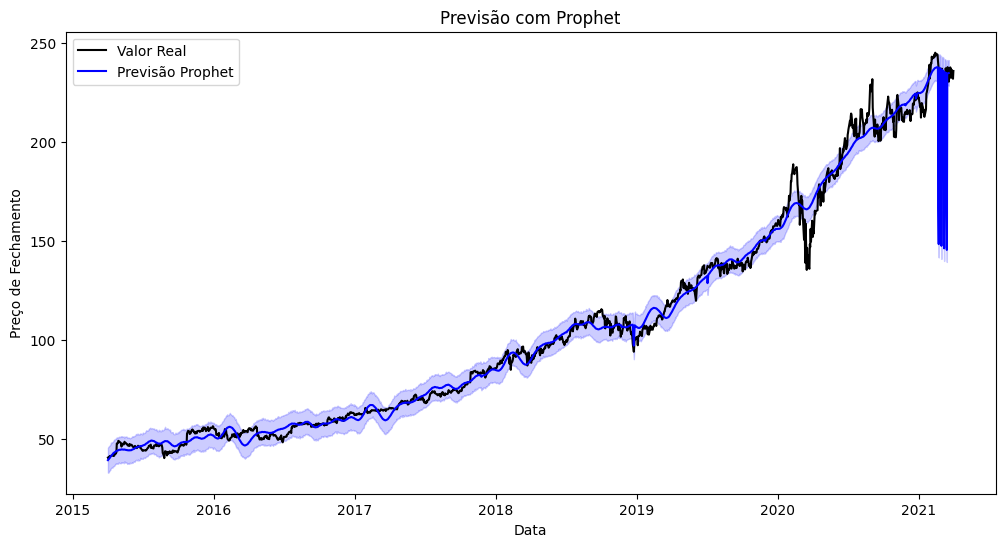

In [9]:
prophet_data = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
train_data = prophet_data[:-30]
test_data = prophet_data[-30:]

model_prophet = Prophet()
model_prophet.fit(train_data)

future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Valor Real', color='black')
plt.plot(forecast['ds'], forecast['yhat'], label='Previsão Prophet', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
plt.title('Previsão com Prophet')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

# Desenvolva o modelo de predição desta série temporal utilizando LSTM

In [30]:
# Modelo de Predição usando LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(dataset, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(dataset)):
        X.append(dataset[i-seq_length:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Utilizar todos os dados para treinamento, semelhante ao Prophet
X_train, y_train = X, y

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0169
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.4699e-04
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.0518e-04
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.9881e-04
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.0934e-04
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1951e-04
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7088e-04
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.7512e-04
Epoch 9/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9842e-04
Epoch 10/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.8281e-04
Epoch 11/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.7163e-04
Epoch 12/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.4413e-04
Epoch 13/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.2675e-04
Epoch 14/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9365e-04
Epoch 15/20
18

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


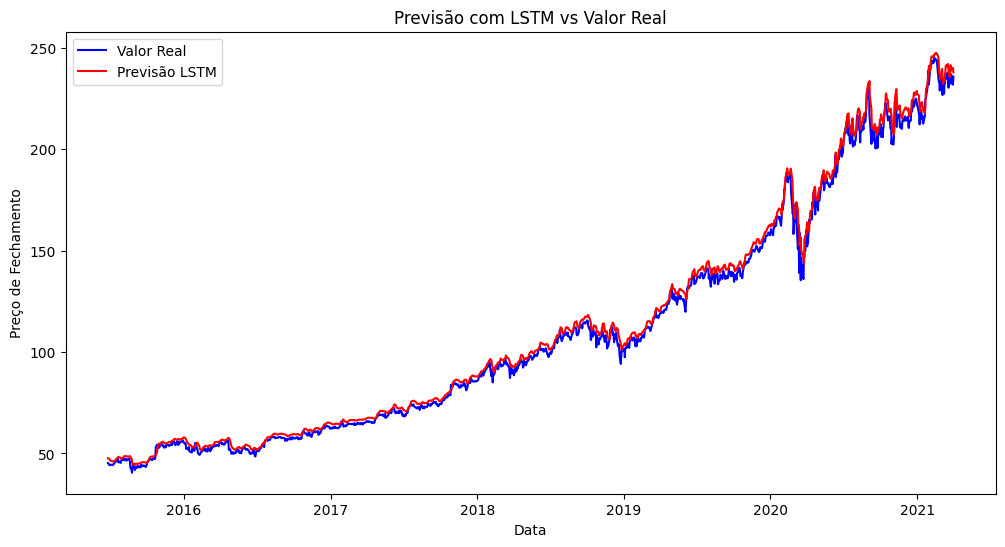

In [32]:
# Previsão de toda a série temporal usando LSTM
lstm_predictions = model_lstm.predict(X_train)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


plt.figure(figsize=(12, 6))
plt.plot(df.index[seq_length:], data['Close'].values[seq_length:], color='blue', label='Valor Real')
plt.plot(df.index[seq_length:], lstm_predictions, color='red', label='Previsão LSTM')
plt.title('Previsão com LSTM vs Valor Real')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

# Apresente alguma métrica de erro obtida ao comparar os resultados obtidos, e justifique a escolha desta métrica (utilizando alguma referência).

O MAE (Mean Absolute Error) é a média das diferenças absolutas entre as previsões e os valores reais. Ele é uma métrica intuitiva que fornece uma medida clara de quão distante, em média, as previsões estão dos valores reais.

Uma das principais qualidades do MAE é a sua facilidade de interpretação; representa, em média, o quanto as previsões estão distantes dos valores reais, tratando todas as diferenças com o mesmo peso e tornando-se uma métrica imparcial que não amplifica grandes desvios. Segundo Diebold e Mariano (1995), a comparação da acurácia das previsões é essencial para determinar a eficácia dos modelos preditivos; nesse contexto, o MAE destaca-se por sua simplicidade e equidade na avaliação dos erros, ao contrário do RMSE (Root Mean Square Error), que pode exagerar os erros extremos.

Referência:

Diebold, F. X., & Mariano, R. S. (1995). Comparing Predictive Accuracy. Journal of Business & Economic Statistics, 13(3), 253-263. DOI: 10.2307/1392185

In [33]:
forecast_test = forecast[-30:]
mae_prophet = mean_absolute_error(test_data['y'], forecast_test['yhat'])
print(f'MAE do modelo Prophet: {mae_prophet:.2f}')

MAE do modelo Prophet: 23.03


In [35]:
# Avaliação do modelo LSTM
mae_lstm = mean_absolute_error(data['Close'].values[seq_length:], lstm_predictions)
print(f'MAE do modelo LSTM: {mae_lstm:.2f}')

MAE do modelo LSTM: 2.83


É possível constatar, então, que o modelo LSTM se mostra muito mais adepto a captar a tendência dos dados do que o modelo Prophet.